# Exercício de Classificação de Análise de Sentimentos

O objetivo do exercício é explorar técnicas de pré-processamento de texto, como remoção de stopwords, tokenização e stemming, além de aplicar técnicas de vetorização, como Bag of Words (BoW) e Term Frequency-Inverse Document Frequency (TF-IDF) para classificar a polaridade de tweets em positivas ou negativas.

## Importar bibliotecas, carregar datasets, etc.

In [1]:
# importar bibliotecas basicas:
import random
import pandas as pd
import matplotlib as plot
import seaborn as sns

# bibliotecas complementares
import codecs
import nltk
import re
import spacy
import string
import unicodedata

In [2]:
# aleatoriedade controlada
random.seed(42)

In [3]:
# carregar dataset de treino
train = pd.read_csv('/kaggle/input/enap-anlise-de-sentimentos/train.csv', index_col=0)

## Pré analise

In [4]:
# Pré avaliação do dataset que está sendo carregado
print(train)

                                                      text  target
ID                                                                
1439813  @sweet19 thanksies but ur so lucky u are in hi...       4
621715                at the park playing tennis. i suck.        0
1188021               @tontokaru happy belated bday babe!        4
300651              @DxBLOCK  DM me your number again pls        0
757974                           Rest in Peace Ed McMahon        0
...                                                    ...     ...
1312263  @conc3p  &quot;I want him to watch&quot; + &qu...       4
143846                       @gershgorin that's awful!!!!        0
1253750  @HipMamaB LOL - I remember that episode!!  (wh...       4
134415                          @cooliesupreme I am sorry        0
1218280     @sesam not to worry, I don't use lifts either        4

[70000 rows x 2 columns]


Dá pra notar que tem muita 💩 no texto...
exemplos:
* uso de simbolos: @ ! ; + &
* girias: LOL DM bday ur
* erro de grafias: thanksies


In [5]:
train.dropna()
train.columns = ['text','target']
train.head()

,text,target
ID,,
1439813,@sweet19 thanksies but ur so lucky u are in hi...,4
621715,at the park playing tennis. i suck.,0
1188021,@tontokaru happy belated bday babe!,4
300651,@DxBLOCK DM me your number again pls,0
757974,Rest in Peace Ed McMahon,0


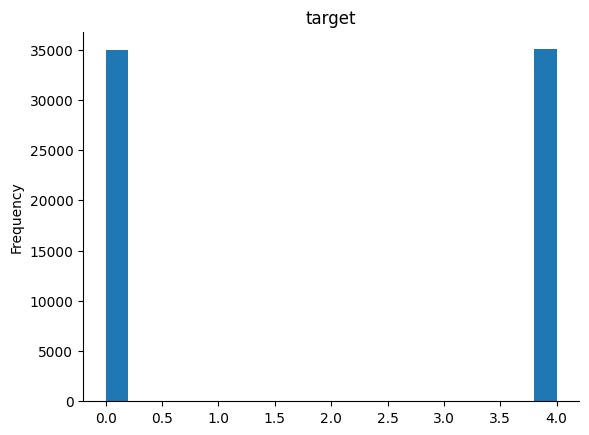

In [6]:
# @title distribuição das classes alvo

from matplotlib import pyplot as plt
train['target'].plot(kind='hist', bins=20, title='target')
plt.gca().spines[['top', 'right',]].set_visible(False)

### Avaliação de distribuição das classes alvo

In [7]:
balance_counts = train.groupby('target')['target'].agg('count').values
balance_counts

array([34970, 35030])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


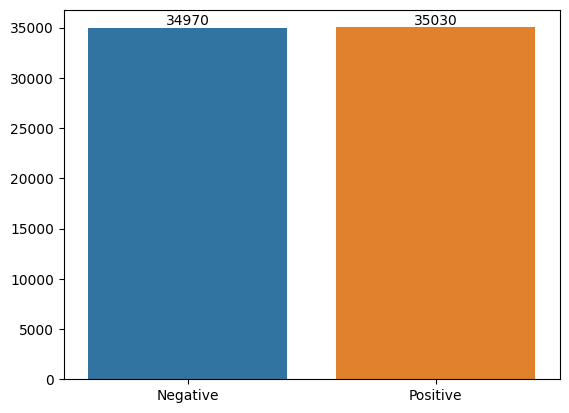

In [8]:
# Analise grafica para avaliar possível desbalanceamento de classes alvo

import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart of the target counts
sns.barplot(x=['Negative', 'Positive'], y=balance_counts)

# Add labels to the bars
for i, value in enumerate(balance_counts):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Show the plot
plt.show()

## Pre-processamento

### Limpeza do corpus de treinamento

In [9]:
'''texto em minúsculas, remova o texto entre colchetes, remova links, remova pontuações e remova palavras que contenham números.'''

def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [10]:
train['text_clean'] = train['text'].apply(clean_text)
train.head()

,text,target,text_clean
ID,,,
1439813,@sweet19 thanksies but ur so lucky u are in hi...,4,thanksies but ur so lucky u are in high schoo...
621715,at the park playing tennis. i suck.,0,at the park playing tennis i suck
1188021,@tontokaru happy belated bday babe!,4,tontokaru happy belated bday babe
300651,@DxBLOCK DM me your number again pls,0,dxblock dm me your number again pls
757974,Rest in Peace Ed McMahon,0,rest in peace ed mcmahon


In [11]:
X_train, y_train = train['text'], train['target']

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X_train)

In [14]:
X_vectorized

<70000x75003 sparse matrix of type '<class 'numpy.int64'>'
	with 826696 stored elements in Compressed Sparse Row format>

In [15]:
from sklearn.naive_bayes import MultinomialNB

In [16]:
nb_model = MultinomialNB()
nb_model.fit(X_vectorized, y_train)

MultinomialNB()

In [17]:
X_test = pd.read_csv('/kaggle/input/enap-anlise-de-sentimentos/test.csv', index_col=0)

In [18]:
X_test = X_test['text']

In [19]:
X_vectorized = vectorizer.transform(X_test)

In [20]:
X_vectorized

<30000x75003 sparse matrix of type '<class 'numpy.int64'>'
	with 332109 stored elements in Compressed Sparse Row format>

In [21]:
y_pred = nb_model.predict(X_vectorized)

In [22]:
y_pred

array([4, 4, 0, ..., 0, 0, 4])

In [23]:
pred = pd.DataFrame({'target': y_pred}, index=X_test.index)

print(pred)

         target
ID             
1432466       4
986192        4
485147        0
1265743       0
346809        0
...         ...
830710        4
27247         4
104191        0
185927        0
1576861       4

[30000 rows x 1 columns]


In [24]:
pred.to_csv('/kaggle/working/submission.csv')